<a href="https://colab.research.google.com/github/HeatherAnnFoster/Spanish-Wine-Project/blob/main/Spanish_Wine_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import precision_score, recall_score,ConfusionMatrixDisplay, accuracy_score, classification_report, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA

import warnings 
warnings.filterwarnings("ignore") # Prevents visual warnings and ignores them

df = pd.read_csv('/content/Project 2.A.csv')
df.head()

#**Source of Data**

Kaggle.com

#**Brief Description of the Data**

Context

This dataset is related to red variants of spanish wines. The dataset describes several popularity and description metrics their effect on it's quality. The datasets can be used for classification or regression tasks. The classes are ordered and not balanced (i.e. the quality goes from almost 5 to 4 points). The task is to predict either the quality of wine or the prices using the given data.

Content

The dataset contains 7500 different types of red wines from Spain with 11 features that describe their price, rating, and even some flavor description. The was collected by me using web scraping from different sources (from wine specialized pages to supermarkets).

#**Target**

There are two possible targets for this dataset.  I will be looking at the quality of the wine of the Rating column for my target.

#**What does one row represent? (A person? A business? An event? A product?)**

The Winery, Year, Country, and Region represents the business or winery that the wine was produced in.  The Wine, Type, Body, and Acidity represents the wine itself or the product.  The Wine column also represents a product or wine.  The Rating, Number of Reviews, and Price represent the sellability of the wine which would also be tied to the business aspect of the dataset.

#**Is this a classification or regression problem?**

Because the target is from the rating column, it is an ordinal column.  The values are 0 to 5, set up as 5 being the best and 0 being the worst.  For this column, I would use an ordinal transformer while I am analyzing this dataset.  It is classification model.

#**How many features does the data have?**

There are 11 features.

In [245]:
df.shape

(7500, 11)

#**How many rows are in the dataset?**

There are 7,500 rows.

#**What, if any, challenges do you foresee in cleaning, exploring, or modeling this dataset?**

I foresee duplicates, missing data and needing multiple preprocessors for various models on different columns.  I also think I will have multiple visualizations to see and show what different columns would look like when compared to others.  This might help determine what I need to tune later.

In [ ]:
df.info()

In [ ]:
df.dtypes

#Duplicated Values
There are 5,452 duplicated rows.  They will be dropped within the next few boxes.

In [248]:
df.duplicated().sum()

5452

In [249]:
df.loc[df.duplicated()]

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
1800,Bodega Tameran,Marmajuelo,2020,4.3,27,Espana,Gran Canaria,29.75,NaN,NaN,NaN
2036,Ramon do Casar,Treixadura,2020,4.2,407,Espana,Ribeiro,11.95,NaN,NaN,NaN
2039,Binigrau,Nounat,2020,4.2,404,Espana,Mallorca,19.90,NaN,NaN,NaN
2050,La Vicalanda,Reserva,2015,4.2,420,Espana,Rioja,17.50,Rioja Red,4.0,3.0
2051,Enrique Mendoza,Santa Rosa,2017,4.2,420,Espana,Alicante,18.90,Red,4.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...
7495,Contino,Reserva,2016,4.2,392,Espana,Rioja,19.98,Rioja Red,4.0,3.0
7496,Conreria d'Scala Dei,Les Brugueres,2018,4.2,390,Espana,Priorato,16.76,Priorat Red,4.0,3.0
7497,Mustiguillo,Finca Terrerazo,2017,4.2,390,Espana,El Terrerazo,24.45,Red,4.0,3.0
7498,Matarromera,Gran Reserva,2011,4.2,389,Espana,Ribera del Duero,64.50,Ribera Del Duero Red,5.0,3.0


The duplicates are dropped now.

In [250]:
df = df.drop_duplicates()
df.duplicated().sum()

0

In [251]:
df.describe(include = 'number')

,rating,num_reviews,price,body,acidity
count,2048.000000,2048.000000,2048.000000,1777.000000,1777.000000
mean,4.401123,573.994629,135.242194,4.258863,2.921216
std,0.147023,1376.153171,272.178316,0.652836,0.334713
min,4.200000,25.000000,4.990000,2.000000,1.000000
25%,4.300000,58.000000,31.917947,4.000000,3.000000
50%,4.400000,141.000000,53.625000,4.000000,3.000000
75%,4.500000,485.500000,110.000000,5.000000,3.000000
max,4.900000,32624.000000,3119.080000,5.000000,3.000000


In [252]:
df.shape

(2048, 11)

#Inconsistent Data

**Below is a look at all the values of the data.  There are no inconsistencies of categorical data in this set.**

In [253]:
df.value_counts()

winery                            wine                                year  rating  num_reviews  country  region    price      type         body  acidity
AGE                               Fuenmayor Gran Reserva              1959  4.3     29           Espana   Rioja     230.00000  Rioja Red    4.0   3.0        1
Navajas                           Mirador de Navajas Reserva Rioja    2011  4.3     29           Espana   Rioja     28.75501   Rioja Red    4.0   3.0        1
Orben                             Malpuesto                           2018  4.4     158          Espana   Rioja     35.50000   Rioja Red    4.0   3.0        1
                                                                      2017  4.3     239          Espana   Rioja     30.30000   Rioja Red    4.0   3.0        1
Ontanon                           Queiron Reserva Vinedos Familiares  2011  4.4     74           Espana   Rioja     26.85000   Rioja Red    4.0   3.0        1
                                                   

In [254]:
df['wine'].value_counts()
print(df['wine'].value_counts())

# change this column to something like is_red ?
# str.contains('red')  --> is_red 1

Tinto                                                 56
Unico                                                 41
Valbuena 5o                                           32
Reserva                                               31
Priorat                                               26
                                                      ..
San Valentin Parellada                                 1
Silvanus Edicion Limitada Ribera del Duero             1
El Jardin de las Iguales Vinedo Historico Garnacha     1
Garnacha Vinas Centenarias                             1
Capricho Crianza                                       1
Name: wine, Length: 847, dtype: int64


In [255]:
df['year'].value_counts()
print(df['year'].value_counts())

2016    243
2017    240
2015    206
2018    196
2014    158
       ... 
1953      1
1972      1
1974      1
1931      1
1925      1
Name: year, Length: 71, dtype: int64


In [256]:
df['rating'].value_counts()
print(df['rating'].value_counts())

4.3    706
4.4    484
4.5    281
4.2    228
4.6    191
4.7    112
4.8     44
4.9      2
Name: rating, dtype: int64


In [257]:
df['num_reviews'].value_counts()
print(df['num_reviews'].value_counts())

28      29
27      26
32      24
35      21
25      20
        ..
966      1
1018     1
1039     1
1047     1
746      1
Name: num_reviews, Length: 817, dtype: int64


#Dropped Column
**Because this column is telling us that all the wine was made in Spain, we can drop it and not have it affect our dataset.**

In [258]:
df['country'].value_counts()

Espana    2048
Name: country, dtype: int64

In [259]:
df = df.drop(columns = 'country')

**Because this data is 1970, 10 % of it would need ot be around 200 unique values.  If the data is looked at, the most frequently used winery is not used 10% of the time.  Therefore, there is no pattern or need to keep this column.  So, it will be dropped.**

In [260]:
df = df.drop(columns = 'winery')

In [261]:
df['region'].value_counts()
print(df['region'].value_counts())

Ribera del Duero                   541
Rioja                              479
Priorato                           250
Toro                                82
Castilla y Leon                     51
                                  ... 
Ribera del Gallego-Cinco Villas      1
Monterrei                            1
Jerez Cream                          1
Condado de Huelva                    1
Abona                                1
Name: region, Length: 76, dtype: int64


In [262]:
df['price'].value_counts()
print(df['price'].value_counts())

75.00     16
95.00     12
34.90     12
59.90     12
26.90     11
          ..
75.92      1
47.52      1
94.20      1
185.15     1
995.00     1
Name: price, Length: 1292, dtype: int64


In [263]:
df['type'].value_counts()
print(df['type'].value_counts())

Ribera Del Duero Red    535
Rioja Red               451
Priorat Red             238
Red                     210
Toro Red                 78
Tempranillo              73
Sherry                   56
Rioja White              37
Pedro Ximenez            35
Grenache                 35
Albarino                 34
Cava                     33
Verdejo                  27
Monastrell               18
Mencia                   17
Montsant Red             17
Syrah                    15
Chardonnay               13
Cabernet Sauvignon       11
Sparkling                 5
Sauvignon Blanc           4
Name: type, dtype: int64


In [264]:
df['body'].value_counts()
print(df['body'].value_counts())

4.0    1003
5.0     634
3.0     106
2.0      34
Name: body, dtype: int64


In [265]:
df['acidity'].value_counts()
print(df['acidity'].value_counts())

3.0    1672
2.0      70
1.0      35
Name: acidity, dtype: int64


In [266]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2048 entries, 0 to 6100
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   wine         2048 non-null   object 
 1   year         2046 non-null   object 
 2   rating       2048 non-null   float64
 3   num_reviews  2048 non-null   int64  
 4   region       2048 non-null   object 
 5   price        2048 non-null   float64
 6   type         1942 non-null   object 
 7   body         1777 non-null   float64
 8   acidity      1777 non-null   float64
dtypes: float64(4), int64(1), object(4)
memory usage: 160.0+ KB


#Missing Values

**I will be dropping the missing values in the year column and in the type column.  The reason I am dropping the year and type is because it is less than 5% of the total dataset so it won't affect the data too much.  Now we have a dataset with values that are dropped.**

In [267]:
df.isna().sum()

wine             0
year             2
rating           0
num_reviews      0
region           0
price            0
type           106
body           271
acidity        271
dtype: int64

In [268]:
df.dropna(subset= ['year'], inplace=True)
df.dropna(subset= ['type'], inplace=True)
df.isna().sum()

wine             0
year             0
rating           0
num_reviews      0
region           0
price            0
type             0
body           165
acidity        165
dtype: int64

#Univariate visuals for the target and all features.
**Identified outliers.**

Acidity and Body have some values that are not as close to each other as other values, but these are not outliers.  There aren't any here.

Text(0, 0.5, 'rating')

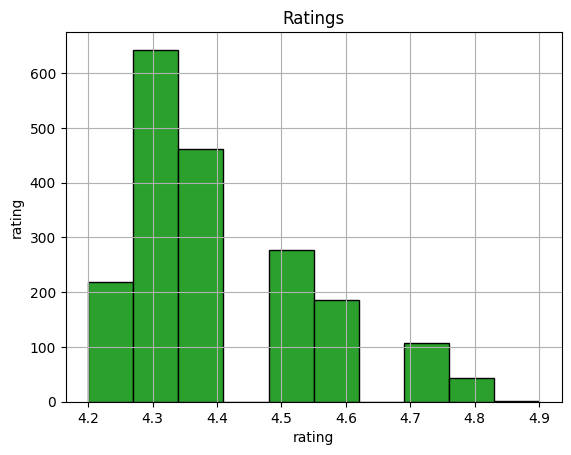

In [269]:
df['rating'].hist()
ax=df['rating'].hist()
ax=df['rating'].hist(bins = 10, edgecolor = 'black')
ax.set_title('Ratings')
ax. set_xlabel("rating")
ax.set_ylabel('rating')

Text(0, 0.5, 'num_reveiws')

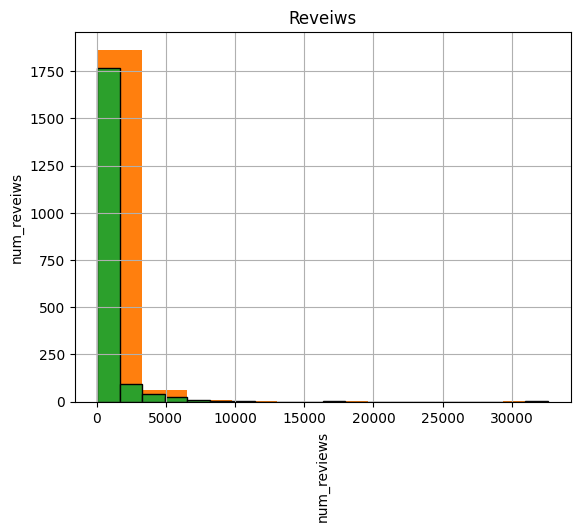

In [270]:
df['num_reviews'].hist()
ax=df['num_reviews'].hist()
ax=df['num_reviews'].hist(bins = 20, edgecolor = 'black')
ax.set_title('Reveiws')
ax. set_xlabel("num_reviews", rotation = 90)
ax.set_ylabel('num_reveiws')

Text(0, 0.5, 'price')

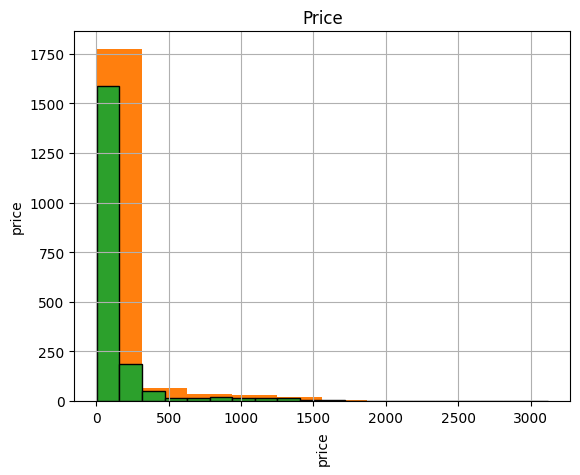

In [271]:
df['price'].hist()
ax=df['price'].hist()
ax=df['price'].hist(bins = 20, edgecolor = 'black')
ax.set_title('Price')
ax. set_xlabel("price", rotation = 90)
ax.set_ylabel('price')

Text(0, 0.5, 'body')

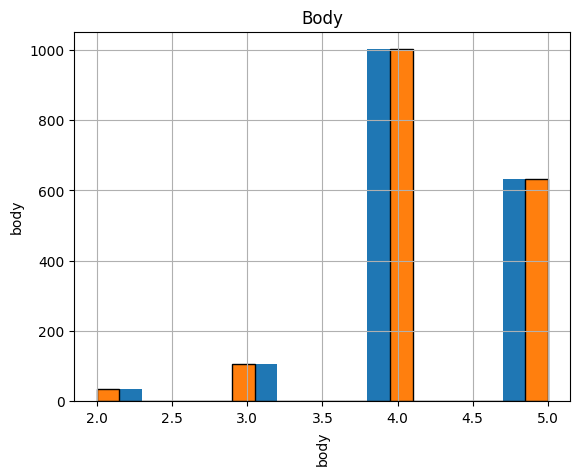

In [272]:
df['body'].hist()
ax=df['body'].hist(bins = 20, edgecolor = 'black')
ax.set_title('Body')
ax. set_xlabel("body", rotation = 90)
ax.set_ylabel('body')

Text(0, 0.5, 'acidity')

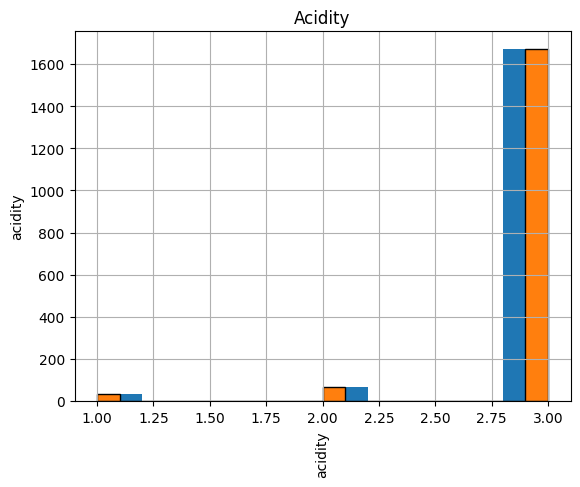

In [273]:
df['acidity'].hist()
ax=df['acidity'].hist(bins = 20, edgecolor = 'black')
ax.set_title('Acidity')
ax. set_xlabel("acidity", rotation = 90)
ax.set_ylabel('acidity')

**With all this information, someone like me, who does not drink wine, can use this to determine what their likely wine of choice would be.  They would be able to answer questions like, "How much acidity do I like in my wine?"  Or "How fully bodied do I want my wine to be?"  They can also try different acidities with bodies and match that to the rating of the wine that they are trying.  To start, I would try a highly rated wine with a low acidity, simply because I do not like the strong taste of wine, then experiement from there.**

In [274]:
#X= df['wine']
#y = df['year']
#fig,ax = plt.subplots()
#ax.scatter(X, y)
#plt.figure(figsize=(12,10))

In [275]:
#df['year'].hist()
#ax=df['year'].hist()
#ax=df['year'].hist(bins = 20, edgecolor = 'black')
#ax.set_title('year')
#ax. set_xlabel("year", rotation = 90)
#ax.set_ylabel('year')
#plt.figure(figsize=(30,28))

In [276]:
#sns.lineplot(data = df, x = 'winery', y = 'region', errorbar=None, marker = 'o')
#plt.figure(figsize=(50,48))

In [277]:
#df['type'].hist()
#ax=df['type'].hist(bins = 20, edgecolor = 'black')
#ax.set_title('Type')
#ax. set_xlabel("type", rotation = 90)
#ax.set_ylabel('type')

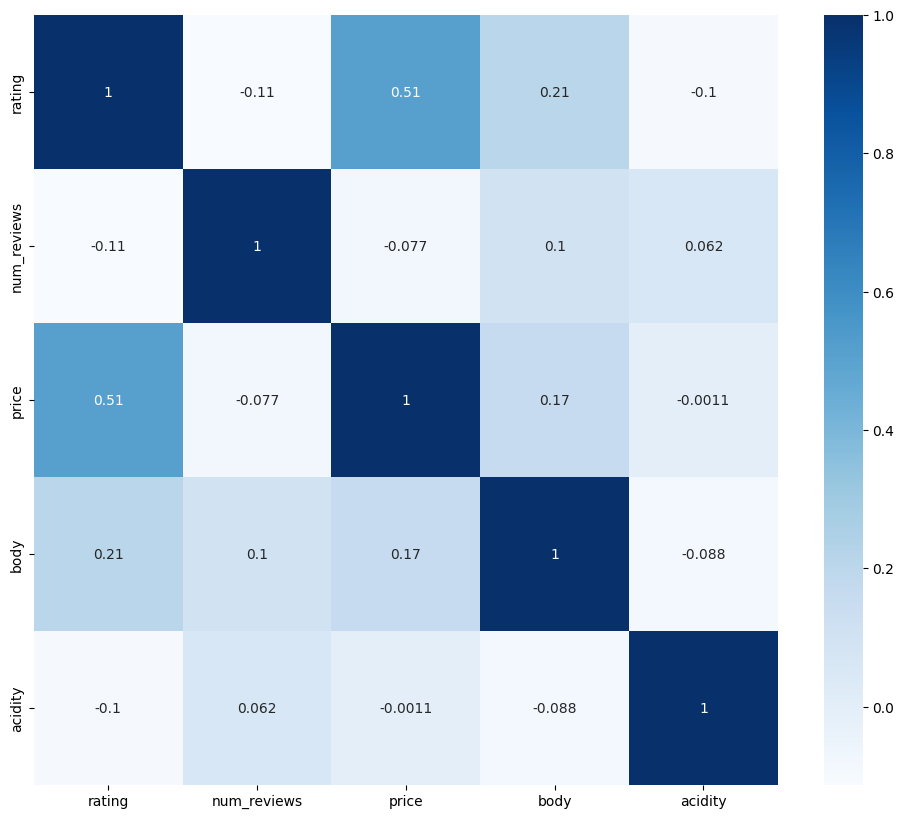

In [278]:
corr = df.corr()
fig, ax = plt.subplots(figsize = (12, 10))
ax = sns.heatmap(corr, cmap= 'Blues', annot = True)

**This correlation map shows a moderate correlation between price and rating at 0.51 or 51%.  That makes sense because the rating would positively impact the sales of the wines.  It would also makes sense to think that if the rating of the wine is higher, the price of it would be higher as well.**

**Another correlation is between body and rating.  This correlation makes sense as well, even though it is not as strong as the first one.  It is only 0.21 or 21%.  If the body of the wine is pleasing or better than another body, it would make sense that the rating of the wine would go up as well.  Perhaps there was a section of the 'rating' survey that was tailored just for body, so that the customers could rate the body on its own merits.**

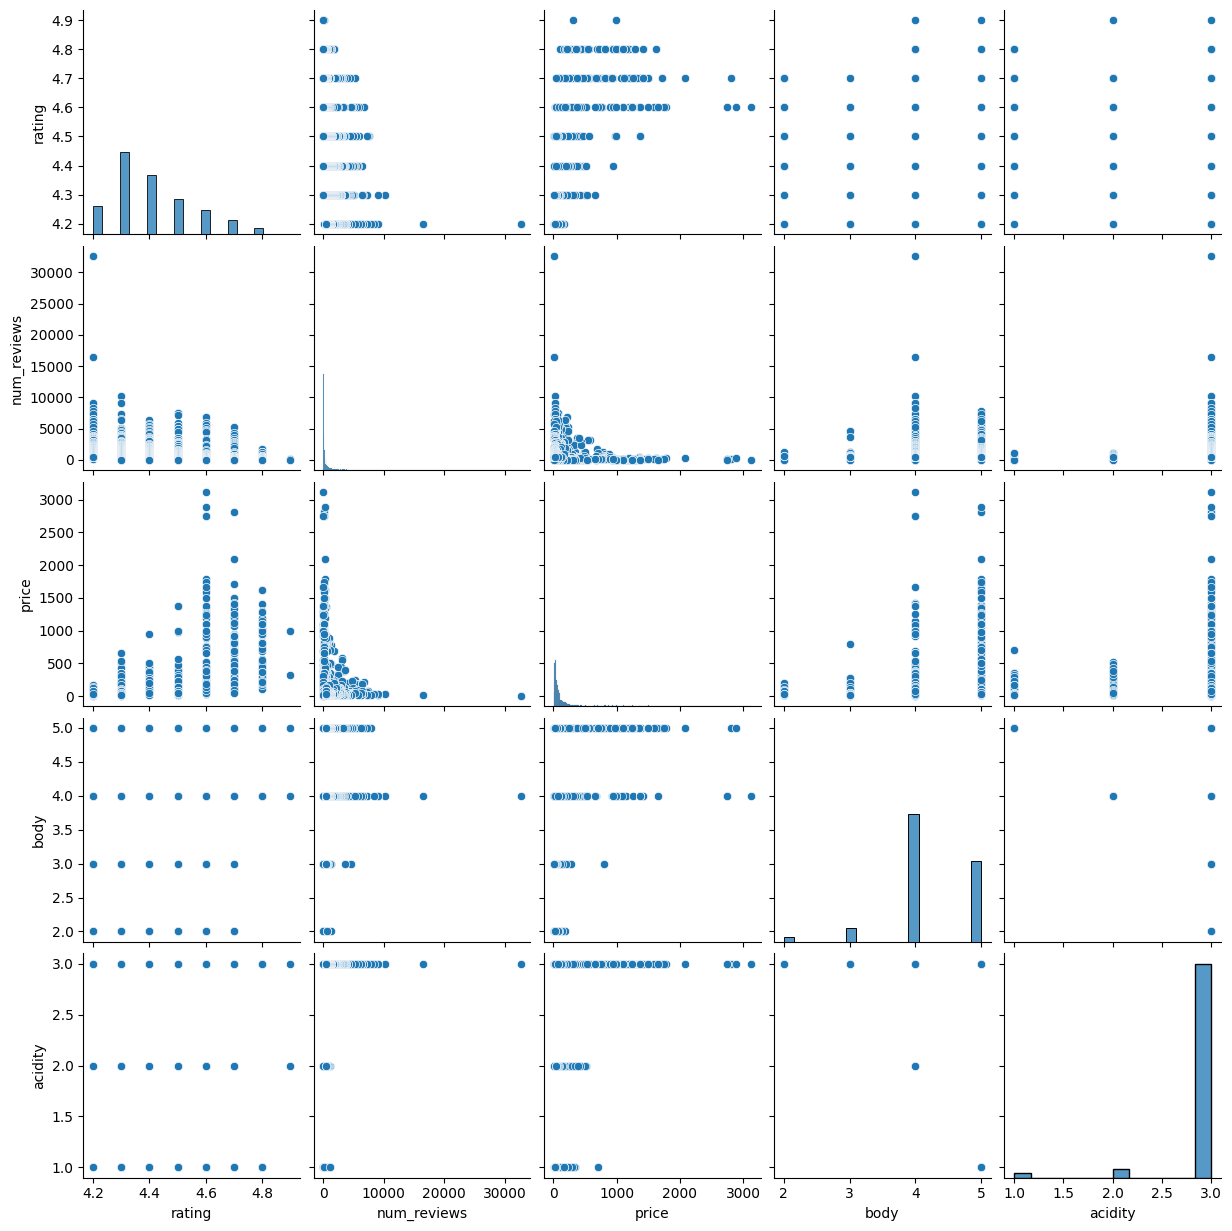

In [279]:
sns.pairplot(df);

**The graphs of num reviews and price mirrors the correlation graph of price and rating in that the higher price is positively impacted by the higher review.  That makes a lot of sense too.  As the quality of the wine increases, the reviews increase and the price can be increased as well.  This can lead to the wine maker creating limited wines that are rated higher and priced accordingly.**

**A graph that was interesting to me, because I don't drink wine, was the body and acidity graph.  As the body or fullness of the wine increased, the acidity increased.  This leads me to wonder if the taste of the wine becomes richer based on the ratio of body to acidity.  That would be something important to know for someone who doesn't drink wine very much.  That may also be a question that a new customer would have to a wine connoisseur in order to determine if they want to try that wine or not.  It would give a wine seller an opportunity to give a new customer a reason to buy different bodies or acidic properites of wine in order to find the new customer's opinon on which wine they liked the best.**

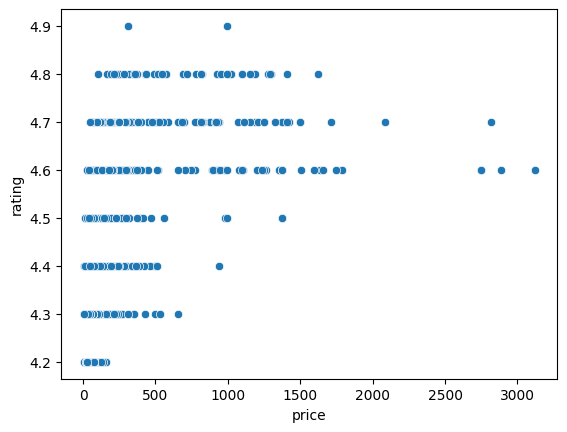

In [280]:
ax = sns.scatterplot(data=df, x = 'price', y = 'rating')

<Axes: xlabel='body', ylabel='acidity'>

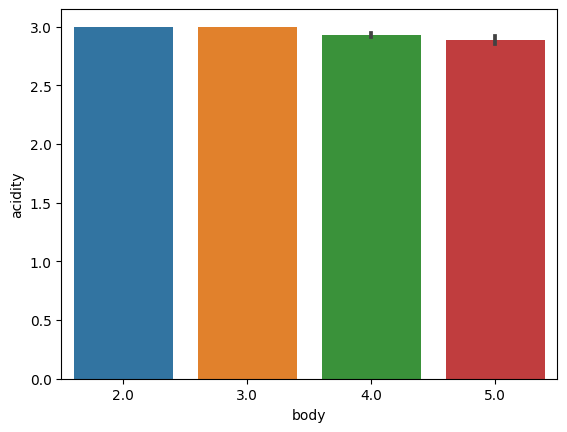

In [281]:
sns.barplot(data=df, x='body', y = 'acidity')

In [282]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1940 entries, 0 to 6100
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   wine         1940 non-null   object 
 1   year         1940 non-null   object 
 2   rating       1940 non-null   float64
 3   num_reviews  1940 non-null   int64  
 4   region       1940 non-null   object 
 5   price        1940 non-null   float64
 6   type         1940 non-null   object 
 7   body         1775 non-null   float64
 8   acidity      1775 non-null   float64
dtypes: float64(4), int64(1), object(4)
memory usage: 151.6+ KB


#Logistical Regression Model

In [283]:
#Define features (X) and target (y)
y = df['rating'].astype('str')
X = df.drop(columns='rating')

#split the dataset
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 42)

In [284]:
#y_train.dtype

In [285]:
#y_train.value_counts()

In [286]:
#Instantiate the column selectors
num_selector = make_column_selector(dtype_include = 'number')
cat_selector = make_column_selector(dtype_include = 'object')

In [287]:
#Instantiate the transformers
scaler = StandardScaler()
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')

#Instantiate the Imputer
number_imputer = SimpleImputer(strategy = 'mean')
frequent_imputer = SimpleImputer(strategy= 'most_frequent')

num_pipe = make_pipeline (number_imputer, scaler)
cat_pipe = make_pipeline (frequent_imputer, ohe)

In [288]:
##Create Tuples
number_tuple = (num_pipe, num_selector)
category_tuple = (cat_pipe, cat_selector)

## Create Preprocessor
preprocessor = make_column_transformer (number_tuple,
                                        category_tuple)

## Create an instance of the model
log_reg = LogisticRegression()
##Create pipeline
log_reg_pipe = make_pipeline(preprocessor, log_reg)
##Fit the model
log_reg_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7faf0fec8d90>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7faf0fecb9d0>)])),
                ('logisticregression', LogisticRegression())])

In [289]:
## Save the model's predictions for the train dataset
train_preds = log_reg_pipe.predict(X_train)
## Save the model's predictions for the test dataset
test_preds = log_reg_pipe.predict(X_test)

In [ ]:
predictions = log_reg_pipe.predict(X_test)
predictions

In [291]:
## print the classification reports
print('Train Report')
print(classification_report(y_train, train_preds))

print('Test Report')
print(classification_report(y_test, test_preds))

Train Report
              precision    recall  f1-score   support

         4.2       0.83      0.67      0.74       165
         4.3       0.66      0.88      0.75       484
         4.4       0.72      0.70      0.71       360
         4.5       0.73      0.51      0.60       191
         4.6       0.62      0.50      0.55       132
         4.7       0.71      0.57      0.63        84
         4.8       0.78      0.57      0.66        37
         4.9       0.00      0.00      0.00         2

    accuracy                           0.70      1455
   macro avg       0.63      0.55      0.58      1455
weighted avg       0.71      0.70      0.69      1455

Test Report
              precision    recall  f1-score   support

         4.2       0.54      0.28      0.37        54
         4.3       0.41      0.64      0.50       159
         4.4       0.25      0.28      0.27       102
         4.5       0.25      0.12      0.16        86
         4.6       0.40      0.19      0.26        53

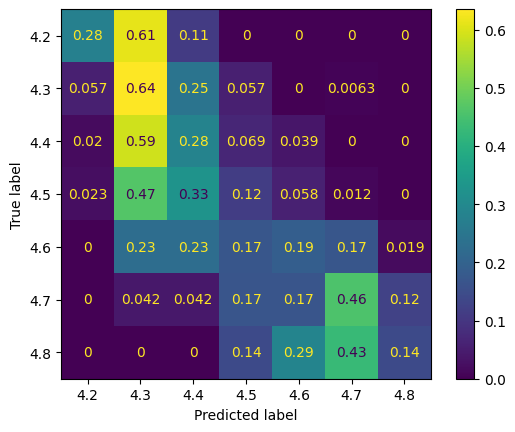

In [292]:
## create confusion matrices
ConfusionMatrixDisplay.from_predictions(y_test, test_preds, normalize = 'true')

##Logistical Regression Comments

**The Confusion Matrix is showing that the best rating prediction is 64% at the 4.3 rating of a wine. The next closest rating is 4.2 at 61%.  So, it would seem that if the stakeholders wanted to sell more wine or have new customers try their wine, they would want a wine with a rating of 64%.  This percentage is not all that great.  So the model will be tuned to see if it can rise to a better percentage that allows the stakeholders to sell more of their wines to first time or returning customers.**

##Tuning the Logistical Regression



In [293]:
LGTuned = LogisticRegression(solver = 'liblinear', max_iter= 1000)

In [294]:
params = {'logisticregression__penalty': ['l1', 'l2'], 'logisticregression__C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]}

In [295]:
LGTuned_pipe = make_pipeline(preprocessor, LGTuned)
LGTuned_pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7faf0fec8d90>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7faf0fecb9d0>)])),
                ('logisticregression',
                 LogisticRegression(max_iter=1000, solver='liblinear'))])

In [296]:
LGTuned_pipe.get_params()
LGTuned_grid_search = GridSearchCV(LGTuned_pipe, params)

In [297]:
LGTuned_grid_search.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('pipeline-1',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer()),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7faf0fec8d90>),
                                                                        ('pipeline-2',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='mos...
                                                                                         ('onehotencoder',
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse=False))]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7faf0fecb9d0>)])),
                                       ('logisticregression',
                                        LogisticRegression(max_iter=1000,
                                                           solver='liblinear'))]),
             param_grid={'logisticregression__C': [0.0001, 0.001, 0.01, 0.1, 1,
                                                   10, 100, 1000],
                         'logisticregression__penalty': ['l1', 'l2']})

In [298]:
LGTuned_grid_search.best_params_

{'logisticregression__C': 10, 'logisticregression__penalty': 'l1'}

In [299]:
LGbest_model = LGTuned_grid_search.best_estimator_
LGbest_model

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7faefc307b80>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7faefc3061d0>)])),
                ('logisticregression',
                 LogisticRegression(C=10, max_iter=1000, penalty='l1',
                                    solver='liblinear'))])

In [300]:
LGbest_model.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7faefc307b80>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7faefc3061d0>)])),
                ('logisticregression',
                 LogisticRegression(C=10, max_iter=1000, penalty='l1',
                                    solver='liblinear'))])

In [301]:
test_preds = LGbest_model.predict(X_test)
test_preds[:5]

array(['4.3', '4.3', '4.7', '4.3', '4.2'], dtype=object)

In [302]:
print(classification_report (y_test, test_preds))

              precision    recall  f1-score   support

         4.2       0.59      0.44      0.51        54
         4.3       0.43      0.56      0.49       159
         4.4       0.26      0.30      0.28       102
         4.5       0.40      0.24      0.30        86
         4.6       0.50      0.23      0.31        53
         4.7       0.33      0.38      0.35        24
         4.8       0.21      0.43      0.29         7

    accuracy                           0.39       485
   macro avg       0.39      0.37      0.36       485
weighted avg       0.41      0.39      0.38       485



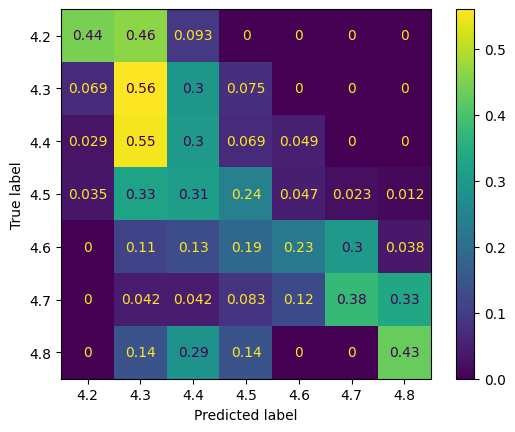

In [303]:
ConfusionMatrixDisplay.from_predictions(y_test, test_preds, normalize = 'true')

##Tuned Logistical Regression Comments

**After tuning the Logistical Regression Model, and using the hyperparameters of C=10 and L1, the information that came back would not benefit the stakeholders because the percentages for the ratings went down instead of going up.  I would not recommend this model.**

#Random Forest Model





In [304]:
#Define features (X) and target (y)
y = df['rating'].astype('str')
X = df.drop(columns='rating')

In [305]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state= 42)

In [306]:
#create tuples
number_tuple = (num_pipe, num_selector)
category_tuple = (cat_pipe, cat_selector)

#create Preprocessor
preprocessor = make_column_transformer (number_tuple,
                                        category_tuple)

#create an instance of the model
rf_default = RandomForestClassifier()
##Create pipeline
rf_default_pipe = make_pipeline(preprocessor, rf_default)

In [307]:
rf_default_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7faf0fec8d90>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7faf0fecb9d0>)])),
                ('randomforestclassifier', RandomForestClassifier())])

In [ ]:
rf_default.get_params()

In [309]:
def eval_classification(true, pred, name, labels=None):
    """shows classification_report and confusion matrix
    for classification model predictions.  Outputs a dataframe of metrics"""

    print(name, '\n')
    print(classification_report(true, pred, target_names=labels))
    ConfusionMatrixDisplay.from_predictions(true, pred, display_labels=labels, )

    plt.show()

    scores = pd.DataFrame()
    scores['Model Name'] = [name]
    scores['Precision'] = [precision_score(true, pred)]
    scores['Recall'] = [recall_score(true, pred)]
    scores['F1 Score'] = [f1_score(true, pred)]
    scores['Accuracy'] = [accuracy_score(true, pred)]
    scores.set_index('Model Name', inplace=True)

    return scores

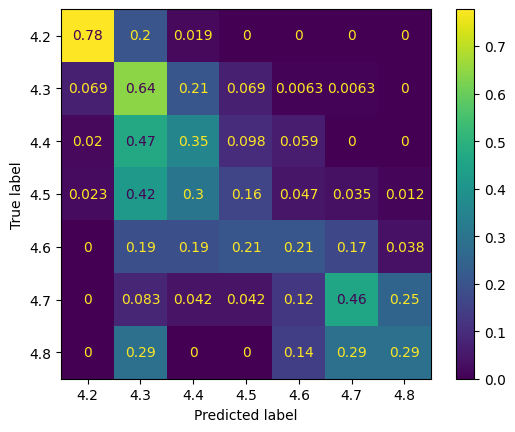

In [310]:
rf_default_predictions = rf_default_pipe.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_test, rf_default_predictions, normalize = 'true')

##Random Forest Comments
**This Confusion Matrix shows that the highest rating is 4.2 at 72%.  The second highest rating is 4.3 at 64%.  These percentages are higher than the original Logistical Regression model by almost 10%.  Because the tuned Logistical Regression model was worse that the original, it will be worse than the Random Forest Model.  So far, this model is the best for the stakeholders of the companies.**

##Tuned Random Forest Model

In [311]:
est_depths = [estimater.get_depth() for estimater in rf_default.estimators_]
max(est_depths)

137

In [ ]:
rf_default_pipe.get_params()

In [ ]:
%%time
params = {'randomforestclassifier__max_depth': [1, max(est_depths), 20],}
          #'randomforestclassifier__n_estimators': [20, 50, 100, 200, 500, 1000],
          #'randomforestclassifier__criterion': ['gini', 'entropy', 'log_loss'],
          #"randomforestclassifier__max_features": ['sqrt', 'log2', None]

rf_tuned = RandomForestClassifier()
rf_tuned_gs_pipe = GridSearchCV(rf_default_pipe, params)
rf_tuned_gs_pipe.fit(X_train, y_train)

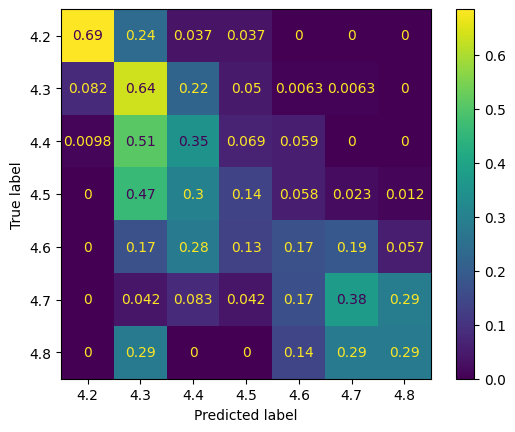

In [314]:
rf_tuned_gs_predictions = rf_tuned_gs_pipe.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_test, rf_tuned_gs_predictions, normalize = 'true')

##Tuned Ransom Forest Model Comments
**This Confusion Matrix shows that the 4.2 rating is the highest rating at 74%.  The second highest rating is 4.3 at 67%.  This tuned model had brought up the percentages more.  This one is the best model so far.  However, there are two more models to look at.**

#PCA for Logisitical Regression

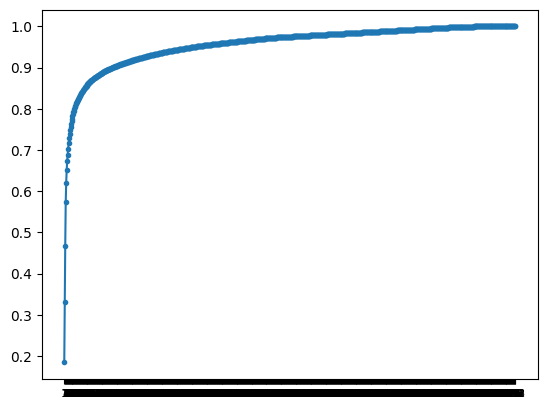

In [315]:
processed_df = preprocessor.fit_transform(X)
pca = PCA()
pca.fit(processed_df)
plt.plot(range(1,934),pca.explained_variance_ratio_.cumsum(), marker='.')
plt.xticks(ticks = range(1,934), fontsize = 8);

Text(0, 0.5, 'Proportion of Explained Variance')

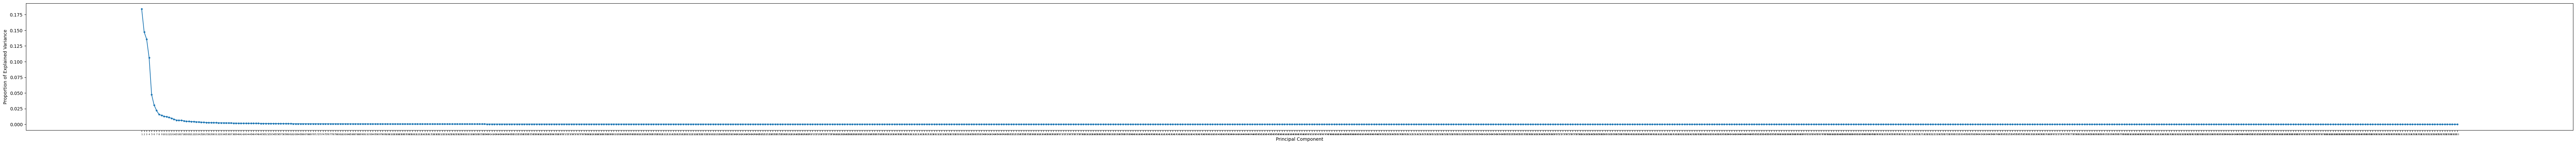

In [316]:
plt.figure(figsize = (100,5))
plt.plot(range (1,934), pca.explained_variance_ratio_, marker= '.')
plt.xticks(ticks = range (1, 934), fontsize = 5)
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Explained Variance')

**I looked for the elbow in the above plot and it looks like the elbow is at 8 Principal Components.  Cutting down from 934 to 8 is likely too much pf a cut, so, I will be using the following component of 90% to determine the correct number of Principal Components.**

In [317]:
pca90 = PCA (n_components= .90)

In [318]:
pca90_pipe = make_pipeline(preprocessor, pca90)

## Create an instance of the model
log_reg = LogisticRegression()
##Create pipeline
log_reg_pipe = make_pipeline(pca90_pipe, log_reg)
##Fit the model
log_reg_pipe.fit(X_train, y_train)

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('columntransformer',
                                  ColumnTransformer(transformers=[('pipeline-1',
                                                                   Pipeline(steps=[('simpleimputer',
                                                                                    SimpleImputer()),
                                                                                   ('standardscaler',
                                                                                    StandardScaler())]),
                                                                   <sklearn.compose._column_transformer.make_column_selector object at 0x7faf0fec8d90>),
                                                                  ('pipeline-2',
                                                                   Pipeline(steps=[('simpleimputer',
                                                                                    SimpleImputer(strategy='most_frequent')),
                                                                                   ('onehotencoder',
                                                                                    OneHotEncoder(handle_unknown='ignore',
                                                                                                  sparse=False))]),
                                                                   <sklearn.compose._column_transformer.make_column_selector object at 0x7faf0fecb9d0>)])),
                                 ('pca', PCA(n_components=0.9))])),
                ('logisticregression', LogisticRegression())])

In [319]:
## Save the model's predictions for the train dataset
train_preds = log_reg_pipe.predict(X_train)
## Save the model's predictions for the test dataset
test_preds = log_reg_pipe.predict(X_test)

In [320]:
## print the classification reports
print('Train Report')
print(classification_report(y_train, train_preds))

print('Test Report')
print(classification_report(y_test, test_preds))

Train Report
              precision    recall  f1-score   support

         4.2       0.62      0.35      0.44       165
         4.3       0.46      0.79      0.58       484
         4.4       0.42      0.32      0.36       360
         4.5       0.47      0.24      0.31       191
         4.6       0.43      0.31      0.36       132
         4.7       0.60      0.36      0.45        84
         4.8       0.70      0.38      0.49        37
         4.9       0.00      0.00      0.00         2

    accuracy                           0.47      1455
   macro avg       0.46      0.34      0.38      1455
weighted avg       0.48      0.47      0.45      1455

Test Report
              precision    recall  f1-score   support

         4.2       0.47      0.17      0.25        54
         4.3       0.41      0.75      0.53       159
         4.4       0.27      0.25      0.26       102
         4.5       0.23      0.08      0.12        86
         4.6       0.30      0.11      0.16        53

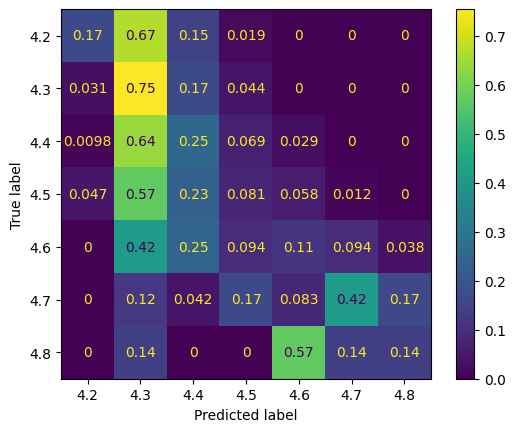

In [321]:
## create confusion matrices
ConfusionMatrixDisplay.from_predictions(y_test, test_preds, normalize = 'true')

##PCA Logistical Regression Comments
**This matrix shows that the rating of 4.3 is the highest at 75%.  It also shows that the 4.2 rating is the second highest at 67%.  This model has the best 4.3 rating at 75%.  The 4.2 rating is not as good.**

#PCA for Random Forest Model

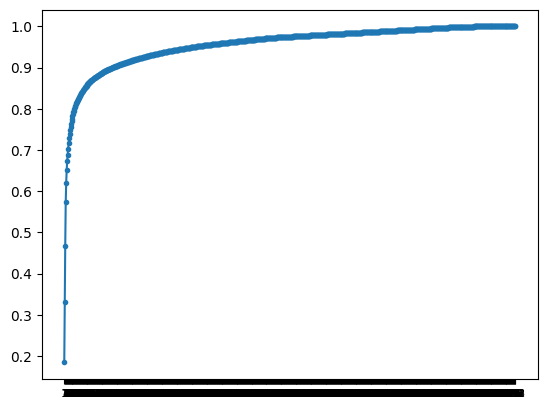

In [322]:
processed_rf = preprocessor.fit_transform(X)
pca = PCA()
pca.fit(processed_rf)
plt.plot(range(1,934),pca.explained_variance_ratio_.cumsum(), marker='.')
plt.xticks(ticks = range(1,934), fontsize = 8);

Text(0, 0.5, 'Proportion of Explained Variance')

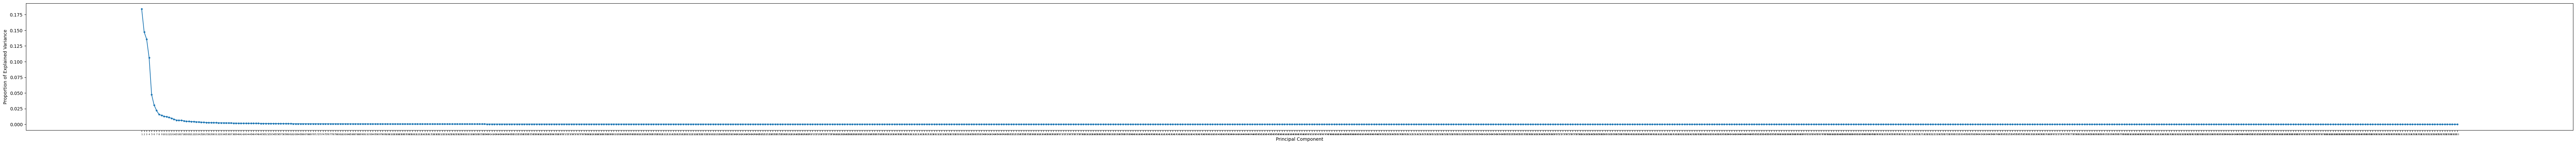

In [323]:
plt.figure(figsize = (100,5))
plt.plot(range (1,934), pca.explained_variance_ratio_, marker= '.')
plt.xticks(ticks = range (1, 934), fontsize = 5)
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Explained Variance')

**I looked for the elbow in the above plot and it looks like the elbow is at 8 Principal Components. Cutting down from 934 to 8 is likely too much pf a cut, so, I will be using the following component of 90% to determine the correct number of Principal Components.**

In [324]:
pca90 = PCA (n_components= .90)

In [325]:
pca90_pipe = make_pipeline(preprocessor, pca90)

## Create an instance of the model
rf_default = RandomForestClassifier()
##Create pipeline
rf_default_pipe = make_pipeline(pca90_pipe, rf_default)
##Fit the model
rf_default_pipe.fit(X_train, y_train)

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('columntransformer',
                                  ColumnTransformer(transformers=[('pipeline-1',
                                                                   Pipeline(steps=[('simpleimputer',
                                                                                    SimpleImputer()),
                                                                                   ('standardscaler',
                                                                                    StandardScaler())]),
                                                                   <sklearn.compose._column_transformer.make_column_selector object at 0x7faf0fec8d90>),
                                                                  ('pipeline-2',
                                                                   Pipeline(steps=[('simpleimputer',
                                                                                    SimpleImputer(strategy='most_frequent')),
                                                                                   ('onehotencoder',
                                                                                    OneHotEncoder(handle_unknown='ignore',
                                                                                                  sparse=False))]),
                                                                   <sklearn.compose._column_transformer.make_column_selector object at 0x7faf0fecb9d0>)])),
                                 ('pca', PCA(n_components=0.9))])),
                ('randomforestclassifier', RandomForestClassifier())])

In [327]:
## Save the model's predictions for the train dataset
train_preds = rf_default_pipe.predict(X_train)
## Save the model's predictions for the test dataset
test_preds = rf_default_pipe.predict(X_test)

In [328]:
## print the classification reports
print('Train Report')
print(classification_report(y_train, train_preds))

print('Test Report')
print(classification_report(y_test, test_preds))

Train Report
              precision    recall  f1-score   support

         4.2       1.00      1.00      1.00       165
         4.3       1.00      1.00      1.00       484
         4.4       1.00      1.00      1.00       360
         4.5       1.00      0.99      1.00       191
         4.6       1.00      1.00      1.00       132
         4.7       1.00      1.00      1.00        84
         4.8       1.00      1.00      1.00        37
         4.9       1.00      1.00      1.00         2

    accuracy                           1.00      1455
   macro avg       1.00      1.00      1.00      1455
weighted avg       1.00      1.00      1.00      1455

Test Report
              precision    recall  f1-score   support

         4.2       0.55      0.33      0.41        54
         4.3       0.43      0.63      0.51       159
         4.4       0.26      0.31      0.29       102
         4.5       0.36      0.17      0.23        86
         4.6       0.44      0.23      0.30        53

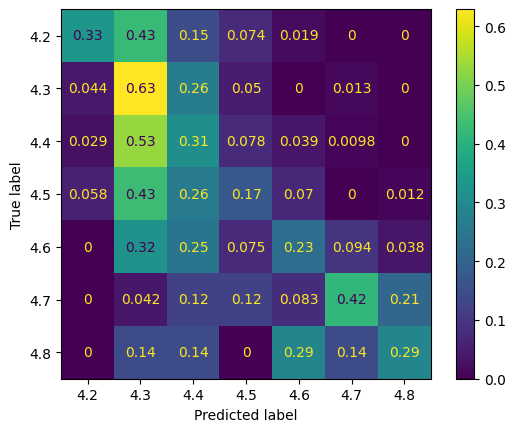

In [329]:
## create confusion matrices
ConfusionMatrixDisplay.from_predictions(y_test, test_preds, normalize = 'true')

##PCA Random Forest Comments
**This Confusion Matrix shows that the highest rating is 4.3 at 63%.  The second highest rating is 4.4 at 53%.  This does not show any positive changes for the PCA aspect of the Random Forest model, so it will not be something that is recommended to the stakeholders.**

#Production Model Choice

Looking through the data gathered, I would recommend that the company uses the PCA Logistical Regression Model for their 4.3 rating.  This was the highest rating that had the highest positive outcome with all the models used.  It returned 75% that a wine would be rated 4.3 from the customers.  If we look at the other data, the price point for this wine was constistently lower than the other ratings, with the exception of the 4.2 rating. It was still at a point where a customer like me, who does not drink wine, would feel comfortable spending that money to taste the wine and see if it was the type they would enjoy.  That correlation was shown in the "Price v. Ratings" scatterplot.

If further analysis can be suggested, it would be to compare the price of the wine to the cost of making it.  Then, compare the cost of the other wines and determine which wine is the most popular, which would be the ratings aspect, and less expensive to produce.  The data suggests that the 4.3 rating would be the one that is most popular with wine drinkers.  This could lead to the production costs of the 4.3 rated wines to lessen and be produced more.